In [1]:
import cv2
import os

In [2]:
DIR_PATH = "Dataset/train/Tedy/"
NEW_DIR_PATH = "Dataset/histogram_equalization/"

In [9]:
# Histogram equalization

def hist_equal(file_name):
    # Read image file
    img = cv2.imread(DIR_PATH + file_name, 0)
    # Apply histogram equalization
    equ = cv2.equalizeHist(img)
    # Save file to new directory
    cv2.imwrite(NEW_DIR_PATH + file_name, equ)

In [8]:
# Iterate through each image file
for file_name in os.listdir(DIR_PATH):
    hist_equal(file_name)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [10]:
# Grayscale converter
GRAY_DIR_PATH = "Dataset/grayscale_converter/"

def gray_converter(file_name):
    # Read image file
    img = cv2.imread(DIR_PATH + file_name, 0)
    # Apply histogram equalization
    # Save file to new directory
    cv2.imwrite(GRAY_DIR_PATH + file_name, img)

In [11]:
# Iterate through each image file
for file_name in os.listdir(DIR_PATH):
    gray_converter(file_name)

## RGB HISTOGRAM EQUALIZATION

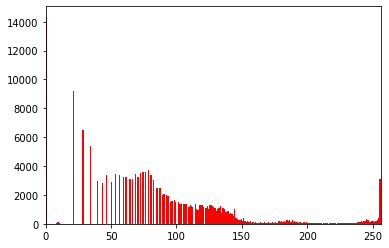

In [1]:
## code to plot histogram in python
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Dataset/train/Tedy/Screenshot_94.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [2]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

In [4]:
histogram_equalization('Dataset/train/Tedy/Screenshot_94.png')

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'split'
> Overload resolution failed:
>  - m is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'm'


## Coba lagi

In [10]:
import numpy as np
import cv2 as cv
img = cv.imread('Dataset/train/Tedy/Screenshot_92.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cl2 = cv.cvtColor(cl1,cv.COLOR_GRAY2BGR)
cv.imwrite('clahe_2.jpg',cl1)
cv.imwrite('clahe_3.jpg',cl2)

True

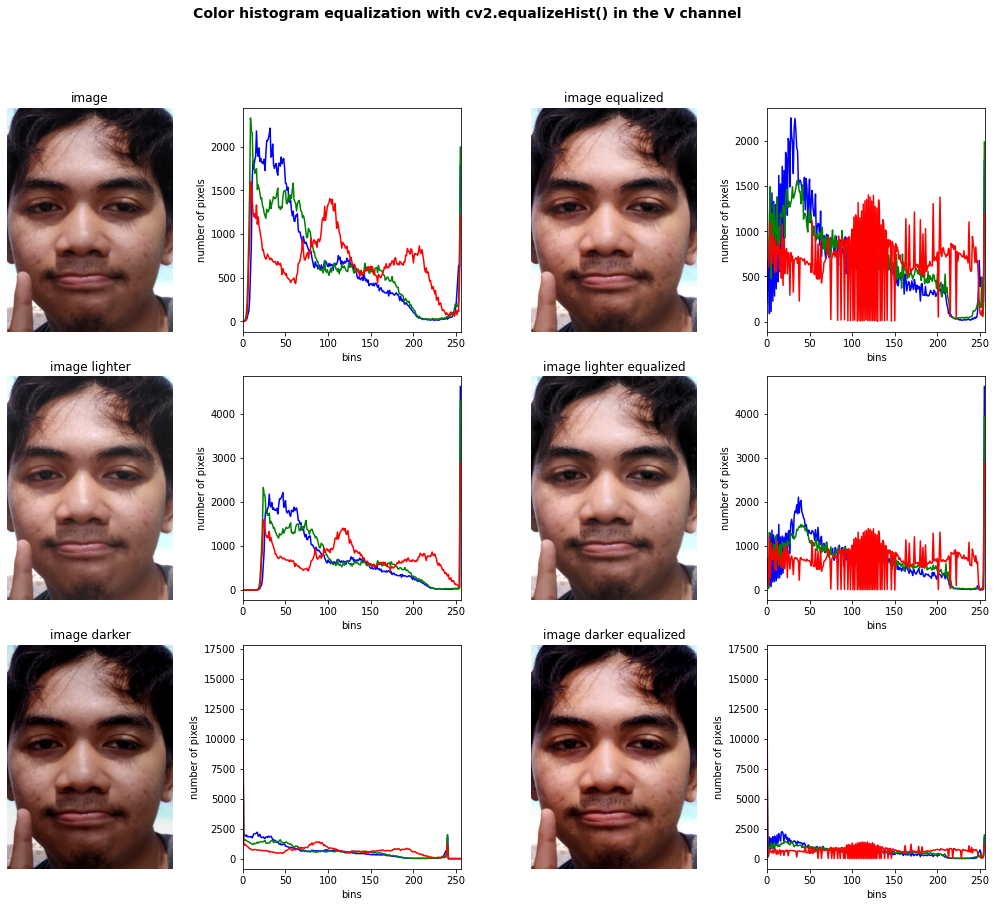

In [11]:
"""
Color histogram equalization using the HSV color space
"""

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def show_hist_with_matplotlib_rgb(hist, title, pos, color):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(3, 4, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)


def hist_color_img(img):
    """Calculates the histogram for a three-channel image"""

    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

def equalize_hist_color_hsv(img):
    """Equalizes the image splitting it after HSV conversion and applying cv2.equalizeHist()
    to the V channel, merging the channels and convert back to the BGR color space"""

    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image

# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 14))
plt.suptitle("Color histogram equalization with cv2.equalizeHist() in the V channel", fontsize=14, fontweight='bold')

# Load the original image and convert it to grayscale
image = cv2.imread('Dataset/train/Tedy/Screenshot_92.png')

# Calculate the histogram for this BGR image:
hist_color = hist_color_img(image)
image_eq = equalize_hist_color_hsv(image)

# Equalize the image and calculate histogram:
hist_image_eq = hist_color_img(image_eq)

# Add 15 to every pixel on the grayscale image (the result will look lighter) and calculate histogram
M = np.ones(image.shape, dtype="uint8") * 15
added_image = cv2.add(image, M)
hist_color_added_image = hist_color_img(added_image)

# Equalize image and calculate histogram
added_image_eq = equalize_hist_color_hsv(added_image)
hist_added_image_eq = hist_color_img(added_image_eq)

# Subtract 15 from every pixel (the result will look darker) and calculate histogram
subtracted_image = cv2.subtract(image, M)
hist_color_subtracted_image = hist_color_img(subtracted_image)

# Equalize image and calculate histogram
subtracted_image_eq = equalize_hist_color_hsv(subtracted_image)
hist_subtracted_image_eq = hist_color_img(subtracted_image_eq)

# Plot the images and the histograms (without equalization first)
show_img_with_matplotlib(image, "image", 1)
show_hist_with_matplotlib_rgb(hist_color, "color histogram", 2, ['b', 'g', 'r'])
show_img_with_matplotlib(added_image, "image lighter", 5)
show_hist_with_matplotlib_rgb(hist_color_added_image, "color histogram", 6, ['b', 'g', 'r'])
show_img_with_matplotlib(subtracted_image, "image darker", 9)
show_hist_with_matplotlib_rgb(hist_color_subtracted_image, "color histogram", 10, ['b', 'g', 'r'])

# Plot the images and the histograms (with equalization)
show_img_with_matplotlib(image_eq, "image equalized", 3)
show_hist_with_matplotlib_rgb(hist_image_eq, "color histogram equalized", 4, ['b', 'g', 'r'])
show_img_with_matplotlib(added_image_eq, "image lighter equalized", 7)
show_hist_with_matplotlib_rgb(hist_added_image_eq, "color histogram equalized", 8, ['b', 'g', 'r'])
show_img_with_matplotlib(subtracted_image_eq, "image darker equalized", 11)
show_hist_with_matplotlib_rgb(hist_subtracted_image_eq, "color histogram equalized", 12, ['b', 'g', 'r'])

# Show the Figure:
plt.show()

## HE Color Convert To YCrCb

In [6]:
import cv2
import numpy as np

img = cv2.imread('Dataset/train/Tedy/Screenshot_68.png')

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Color input image', img)
cv2.imshow('Histogram equalized', img_output)

cv2.waitKey(0)

-1

## CLAHE

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('Dataset/train/Tedy/Screenshot_92.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]

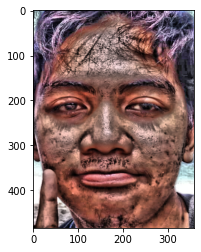

In [4]:
clahe = cv2.createCLAHE(clipLimit = 15.0, tileGridSize = (20,20))
v = clahe.apply(v)

hsv_img = np.dstack((h,s,v))

rgb = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb);